In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', 50)
sns.set_theme()

In [3]:
df = pd.read_csv('hurto_a_persona_transporte_publico.csv', sep=';')

<ipython-input-3-6e65b51725f8>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hurto_a_persona_transporte_publico.csv', sep=';')


In [4]:
df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida
0,2017-01-01T16:00:00.000-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Taxi,Sin dato,Sin dato,Hurto a persona,Atraco,Sin dato,De celular,Arma de fuego,Sin dato,Sin dato,Campo Valdés No.1,#0410,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato
1,2017-01-01T16:00:00.000-05:00,1.0,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Taxi,Sin dato,Sin dato,Hurto a persona,Descuido,Sin dato,No,No,Sin dato,Sin dato,La Loma de los Bernal,#1611,16,Vía pública,Belén,Elementos escolares,Elementos escolares,Mercancía,-1,Sin dato,Sin dato,Sin dato
2,2017-01-01T16:00:00.000-05:00,1.0,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Taxi,Sin dato,Sin dato,Hurto a persona,Descuido,Sin dato,No,No,Sin dato,Sin dato,La Loma de los Bernal,#1611,16,Vía pública,Belén,Computador,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato
3,2017-01-02T10:30:00.000-05:00,1.0,6.242754,-75.548365,Hombre,36,Casado(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Taxi,Sin dato,Sin dato,Hurto a persona,Atraco,Sin dato,A taxista,Arma de fuego,Sin dato,Sin dato,El Pinal,#0810,8,Vía pública,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato
4,2017-01-02T10:30:00.000-05:00,1.0,6.242754,-75.548365,Hombre,36,Casado(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Taxi,Sin dato,Sin dato,Hurto a persona,Atraco,Sin dato,A taxista,Arma de fuego,Sin dato,Sin dato,El Pinal,#0810,8,Vía pública,Villa Hermosa,Celular,Tecnología,Mercancía,-1,Blanco,Sin dato,Sin dato


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20492 entries, 0 to 20491
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha_hecho          20492 non-null  object 
 1   cantidad             20492 non-null  float64
 2   latitud              19765 non-null  float64
 3   longitud             19765 non-null  float64
 4   sexo                 20492 non-null  object 
 5   edad                 20492 non-null  int64  
 6   estado_civil         20492 non-null  object 
 7   grupo_actor          20492 non-null  object 
 8   actividad_delictiva  20492 non-null  object 
 9   parentesco           20492 non-null  object 
 10  ocupacion            20492 non-null  object 
 11  discapacidad         20492 non-null  object 
 12  grupo_especial       20492 non-null  object 
 13  medio_transporte     20492 non-null  object 
 14  nivel_academico      20492 non-null  object 
 15  testigo              20492 non-null 

## Data cleaning

In [6]:
df.fecha_hecho = pd.to_datetime(df.fecha_hecho)
df.fecha_hecho = pd.to_datetime(df.fecha_hecho.dt.date)

In [7]:
for column in df.columns:
    print(f'{column} -> {df[column].unique()}')

fecha_hecho -> ['2017-01-01T00:00:00.000000000' '2017-01-02T00:00:00.000000000'
 '2017-01-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']
cantidad -> [1.]
latitud -> [6.27623616 6.21907115 6.24275379 ... 6.24253104 6.23833902 6.25903016]
longitud -> [-75.55353312 -75.60299601 -75.54836478 ... -75.57153966 -75.57235986
 -75.58382868]
sexo -> ['Hombre' 'Mujer' 'Sin dato']
edad -> [37 29 36 22 35 26 52 44 30 50 33 39 62 56 32 34 46 49 25 27 59 45 58 28
 24 31 65 42 21 38 41 55 51 19 54 57 18 60 43 23 40 20 85 17 15 -1 47 16
 53 70 48 67 66 71  9 78 72 64 63 61 73 68 77 14 69 86 75 74 83 13 84 76
 80 89  7 82 79 12 90  8 91 11]
estado_civil -> ['Casado(a)' 'Unión marital de hecho' 'Soltero(a)' 'Sin dato'
 'Divorciado(a)' 'Viudo(a)']
grupo_actor -> ['Sin dato']
actividad_delictiva -> ['Sin dato']
parentesco -> ['Sin dato']
ocupacion -> ['Sin dato']
discapacidad -> ['Sin dato']
grupo_especial -> ['Sin dato']
medio_t

We can see there are many columns that only have 'Sin dato' (Null) values in them. These columns don't bring any useful information for the analysis, so they will be deleted. There are other columns that will not be used because the information they provide may not seem usefull i.e. color. All the names of the columns that will be deleted, are listed in **drop_columns.txt** file.

In [8]:
with open('drop_columns.txt', 'r') as file:
    columns_to_drop = [line.strip() for line in file]

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.head()

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien
0,2017-01-01,6.276236,-75.553533,Hombre,37,Casado(a),Taxi,Atraco,De celular,Arma de fuego,Campo Valdés No.1,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía
1,2017-01-01,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Taxi,Descuido,No,No,La Loma de los Bernal,16,Vía pública,Belén,Elementos escolares,Elementos escolares,Mercancía
2,2017-01-01,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Taxi,Descuido,No,No,La Loma de los Bernal,16,Vía pública,Belén,Computador,Tecnología,Mercancía
3,2017-01-02,6.242754,-75.548365,Hombre,36,Casado(a),Taxi,Atraco,A taxista,Arma de fuego,El Pinal,8,Vía pública,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
4,2017-01-02,6.242754,-75.548365,Hombre,36,Casado(a),Taxi,Atraco,A taxista,Arma de fuego,El Pinal,8,Vía pública,Villa Hermosa,Celular,Tecnología,Mercancía


In [10]:
for column in df.columns:
    print(f'{column} -> {df[column].unique()}')

fecha_hecho -> ['2017-01-01T00:00:00.000000000' '2017-01-02T00:00:00.000000000'
 '2017-01-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']
latitud -> [6.27623616 6.21907115 6.24275379 ... 6.24253104 6.23833902 6.25903016]
longitud -> [-75.55353312 -75.60299601 -75.54836478 ... -75.57153966 -75.57235986
 -75.58382868]
sexo -> ['Hombre' 'Mujer' 'Sin dato']
edad -> [37 29 36 22 35 26 52 44 30 50 33 39 62 56 32 34 46 49 25 27 59 45 58 28
 24 31 65 42 21 38 41 55 51 19 54 57 18 60 43 23 40 20 85 17 15 -1 47 16
 53 70 48 67 66 71  9 78 72 64 63 61 73 68 77 14 69 86 75 74 83 13 84 76
 80 89  7 82 79 12 90  8 91 11]
estado_civil -> ['Casado(a)' 'Unión marital de hecho' 'Soltero(a)' 'Sin dato'
 'Divorciado(a)' 'Viudo(a)']
medio_transporte -> ['Taxi' 'Metro' 'Autobus']
modalidad -> ['Atraco' 'Descuido' 'Cosquilleo' 'Raponazo' 'Sin dato'
 'Comisión de delito' 'Engaño' 'Escopolamina' 'Clonación de tarjeta'
 'Rompimiento ce

<AxesSubplot:ylabel='Frequency'>

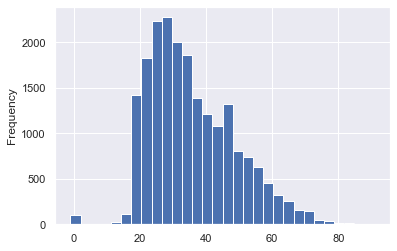

In [11]:
df.edad.plot(kind='hist', bins=30)

In [12]:
print(sorted(df.edad.unique()))

[-1, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 89, 90, 91]


In [13]:
df[df.edad < 10]

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien
213,2017-02-28,6.278174,-75.578889,Hombre,-1,Sin dato,Taxi,Atraco,No,Arma cortopunzante,Altamira,7,Vía pública,Castilla,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
448,2017-04-21,6.236163,-75.540741,Hombre,-1,Soltero(a),Taxi,Atraco,A taxista,Arma de fuego,Villatina,8,Vía pública,Villa Hermosa,Celular,Tecnología,Mercancía
450,2017-04-21,6.236163,-75.540741,Hombre,-1,Soltero(a),Taxi,Atraco,A taxista,Arma de fuego,Villatina,8,Vía pública,Villa Hermosa,Celular,Tecnología,Mercancía
495,2017-05-03,6.252106,-75.565140,Hombre,9,Casado(a),Autobus,Raponazo,No,No,La Candelaria,10,Bus de servicio público,Candelaria,Celular,Tecnología,Mercancía
818,2017-07-08,6.250231,-75.567714,Mujer,-1,Unión marital de hecho,Autobus,Raponazo,De celular,No,La Candelaria,10,Vía pública,Candelaria,Celular,Tecnología,Mercancía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,2018-03-01,6.223207,-75.579538,Hombre,-1,Soltero(a),Autobus,Atraco,A bus de servicio público,Arma de fuego,Santa Fé,15,Bus de servicio público,Belén,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
16192,2018-08-02,6.243138,-75.571362,Mujer,-1,Soltero(a),Metro,Cosquilleo,No,No,Calle Nueva,10,Estación del Metro,Candelaria,Billetera,Prendas de vestir y accesorios,Mercancía
16518,2018-11-14,6.251438,-75.563672,Mujer,-1,Viudo(a),Autobus,Cosquilleo,Sin dato,No,Villa Nueva,10,Bus de servicio público,Candelaria,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
18299,2018-11-30,6.245631,-75.572613,Hombre,-1,Divorciado(a),Taxi,Atraco,De celular,Arma de fuego,Guayaquil,10,Vía pública,Candelaria,Celular,Tecnología,Mercancía


We can see there are a lot of **-1** as values in age column. We don't know why this happens but for the sake of this analysis, we'll only work with people with age greater than 10. Actually, we can see that there's a 9 years old man which is married; this could be a mistake or even it could be correct but we just will delete it since we can not direct communication with the owner of data.

In [14]:
df = df[df.edad > 10]

In [15]:
df.codigo_comuna.replace('SIN DATO', 0, inplace=True)
df.codigo_comuna = pd.to_numeric(df.codigo_comuna)

## Data exploration

<AxesSubplot:>

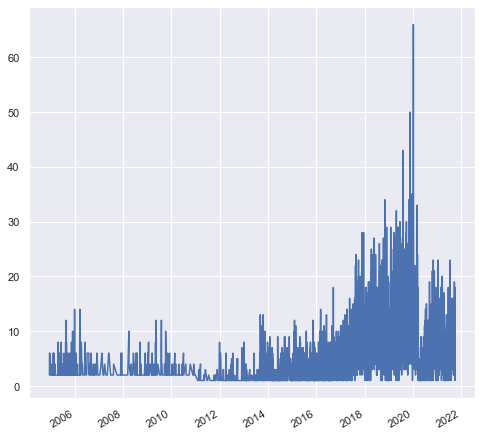

In [16]:
df.fecha_hecho.value_counts().plot(kind='line', figsize=(8, 8))

Hombre    10249
Mujer     10140
Name: sexo, dtype: int64


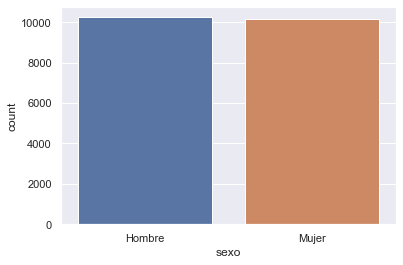

In [17]:
sns.countplot(data=df, x='sexo')
print(df.sexo.value_counts())

Since gender is going to be an important reference for our analysis, we will drop values with null values ("Sin dato") in **sexo** column.

In [18]:
df = df[df.sexo != 'Sin dato']

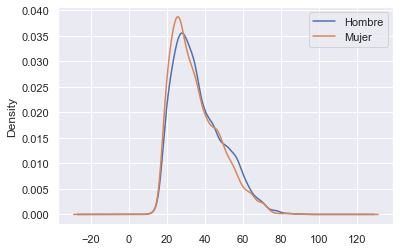

In [19]:
df[df.sexo == 'Hombre']['edad'].plot(kind='density', label='Hombre')
df[df.sexo == 'Mujer']['edad'].plot(kind='density', label='Mujer')
plt.legend()

<AxesSubplot:ylabel='Frequency'>

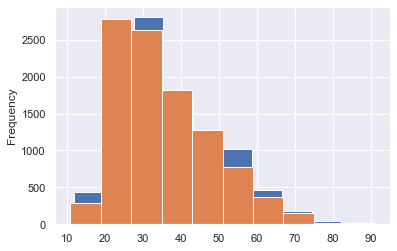

In [20]:
df[df.sexo == 'Hombre']['edad'].plot(kind='hist', label='Hombre')
df[df.sexo == 'Mujer']['edad'].plot(kind='hist', label='Mujer')

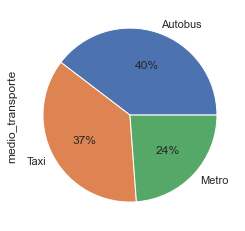

In [21]:
df.medio_transporte.value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

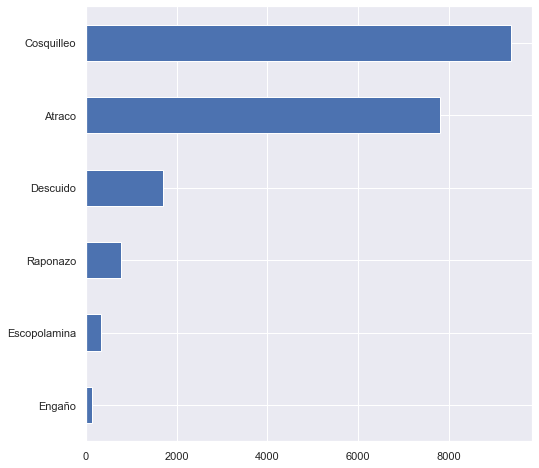

In [22]:
mod = df.modalidad.value_counts()
mod[mod > 100].sort_values().plot(kind='barh', figsize=(8, 8))

<AxesSubplot:>

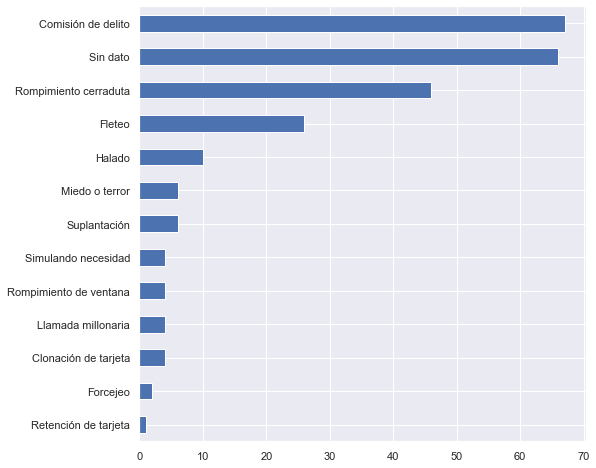

In [23]:
mod[mod < 100].sort_values().plot(kind='barh', figsize=(8, 8))

<AxesSubplot:>

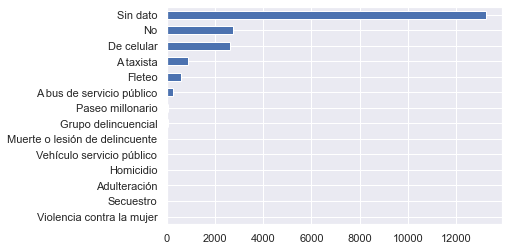

In [24]:
df.conducta_especial.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

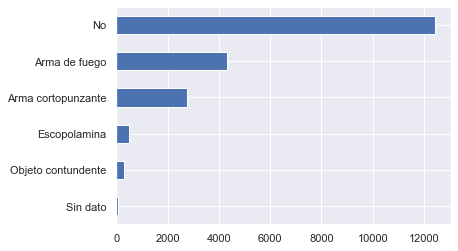

In [25]:
df.arma_medio.value_counts().sort_values().plot(kind='barh')

In [26]:
df.columns

Index(['fecha_hecho', 'latitud', 'longitud', 'sexo', 'edad', 'estado_civil',
       'medio_transporte', 'modalidad', 'conducta_especial', 'arma_medio',
       'nombre_barrio', 'codigo_comuna', 'lugar', 'sede_receptora', 'bien',
       'categoria_bien', 'grupo_bien'],
      dtype='object')

<AxesSubplot:>

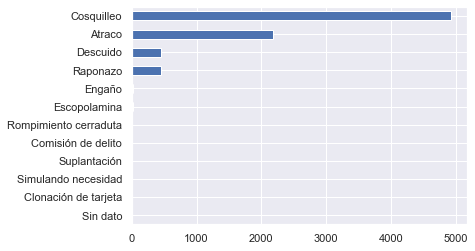

In [27]:
df[df.medio_transporte == 'Autobus']['modalidad'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

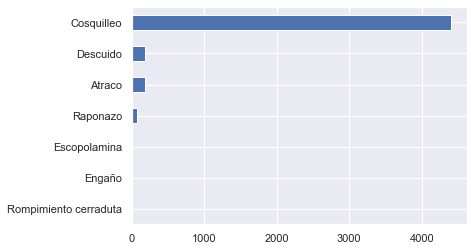

In [28]:
df[df.medio_transporte == 'Metro']['modalidad'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

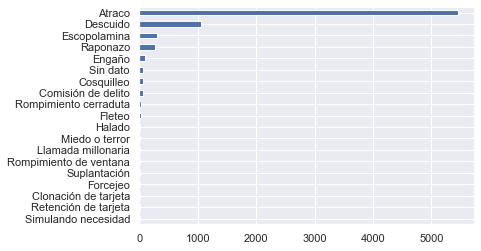

In [29]:
df[df.medio_transporte == 'Taxi']['modalidad'].value_counts().sort_values().plot(kind='barh')

In [30]:
df.head()

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien
0,2017-01-01,6.276236,-75.553533,Hombre,37,Casado(a),Taxi,Atraco,De celular,Arma de fuego,Campo Valdés No.1,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía
1,2017-01-01,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Taxi,Descuido,No,No,La Loma de los Bernal,16,Vía pública,Belén,Elementos escolares,Elementos escolares,Mercancía
2,2017-01-01,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Taxi,Descuido,No,No,La Loma de los Bernal,16,Vía pública,Belén,Computador,Tecnología,Mercancía
3,2017-01-02,6.242754,-75.548365,Hombre,36,Casado(a),Taxi,Atraco,A taxista,Arma de fuego,El Pinal,8,Vía pública,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
4,2017-01-02,6.242754,-75.548365,Hombre,36,Casado(a),Taxi,Atraco,A taxista,Arma de fuego,El Pinal,8,Vía pública,Villa Hermosa,Celular,Tecnología,Mercancía


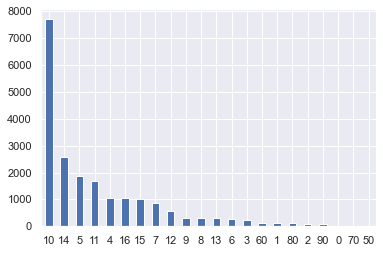

In [31]:
df.codigo_comuna.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

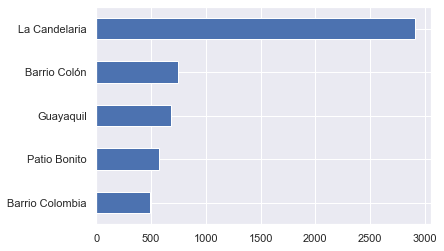

In [32]:
df.nombre_barrio.value_counts().head().sort_values().plot(kind='barh')

<AxesSubplot:>

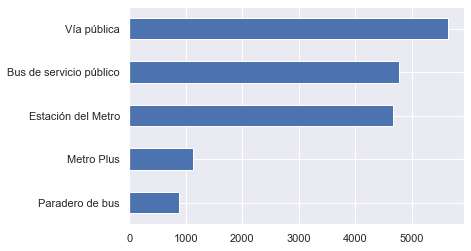

In [33]:
df.lugar.value_counts().head().sort_values().plot(kind='barh')

<AxesSubplot:>

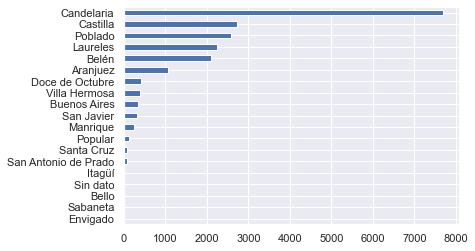

In [34]:
df.sede_receptora.value_counts().sort_values().plot(kind='barh')

In [35]:
df = df[df.sede_receptora != 'Sin dato']

In [36]:
df.columns

Index(['fecha_hecho', 'latitud', 'longitud', 'sexo', 'edad', 'estado_civil',
       'medio_transporte', 'modalidad', 'conducta_especial', 'arma_medio',
       'nombre_barrio', 'codigo_comuna', 'lugar', 'sede_receptora', 'bien',
       'categoria_bien', 'grupo_bien'],
      dtype='object')

In [37]:
df_to_save = df[['fecha_hecho', 'latitud', 'longitud', 'sexo', 'edad', 'medio_transporte', 'modalidad', 'sede_receptora']]

In [38]:
df_to_save.head()

,fecha_hecho,latitud,longitud,sexo,edad,medio_transporte,modalidad,sede_receptora
0,2017-01-01,6.276236,-75.553533,Hombre,37,Taxi,Atraco,Aranjuez
1,2017-01-01,6.219071,-75.602996,Mujer,29,Taxi,Descuido,Belén
2,2017-01-01,6.219071,-75.602996,Mujer,29,Taxi,Descuido,Belén
3,2017-01-02,6.242754,-75.548365,Hombre,36,Taxi,Atraco,Villa Hermosa
4,2017-01-02,6.242754,-75.548365,Hombre,36,Taxi,Atraco,Villa Hermosa


In [39]:
df[df.codigo_comuna == 7]

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien
19,2017-01-05,6.280713,-75.574567,Mujer,44,Unión marital de hecho,Taxi,Descuido,No,No,Córdoba,7,Bus de servicio público,Castilla,Celular,Tecnología,Mercancía
20,2017-01-05,6.280713,-75.574567,Mujer,44,Unión marital de hecho,Taxi,Descuido,No,No,Córdoba,7,Bus de servicio público,Castilla,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
26,2017-01-08,6.283887,-75.583470,Mujer,33,Unión marital de hecho,Taxi,Atraco,No,Escopolamina,López de Mesa,7,Vía pública,Castilla,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
41,2017-01-14,6.281680,-75.604428,Mujer,33,Casado(a),Taxi,Descuido,Sin dato,No,Cucaracho,7,Vía pública,Castilla,Computador,Tecnología,Mercancía
80,2017-01-27,6.265880,-75.586913,Mujer,41,Soltero(a),Autobus,Cosquilleo,De celular,No,San Germán,7,Vía pública,Castilla,Celular,Tecnología,Mercancía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20483,2021-09-30,6.272672,-75.593453,Mujer,29,Casado(a),Taxi,Fleteo,Sin dato,No,Robledo,7,Cajero electrónico,Castilla,Computador,Tecnología,Mercancía
20484,2021-09-30,6.272672,-75.593453,Mujer,29,Casado(a),Taxi,Fleteo,Sin dato,No,Robledo,7,Cajero electrónico,Castilla,Llave,Herramientas,Mercancía
20485,2021-09-30,6.272672,-75.593453,Mujer,29,Casado(a),Taxi,Fleteo,Sin dato,No,Robledo,7,Cajero electrónico,Castilla,Sin dato documentos,Documentos,Mercancía
20486,2021-09-30,6.272672,-75.593453,Mujer,29,Casado(a),Taxi,Fleteo,Sin dato,No,Robledo,7,Cajero electrónico,Castilla,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía
